In [46]:
from google.colab import files
uploaded = files.upload()

Saving Telemedicine_Use_in_the_Last_4_Weeks_20240409.csv to Telemedicine_Use_in_the_Last_4_Weeks_20240409 (3).csv


In [85]:
import pandas as pd
import numpy as np
import io

print(uploaded)


{'Telemedicine_Use_in_the_Last_4_Weeks_20240409 (3).csv': b'Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,40 - 49 years,3.1

In [59]:
df_Telemedicine = pd.read_csv(io.BytesIO(uploaded['Telemedicine_Use_in_the_Last_4_Weeks_20240409 (1).csv']))

KeyError: 'Telemedicine_Use_in_the_Last_4_Weeks_20240409 (1).csv'

In [86]:
#Print DataFrame
df_Telemedicine.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,quarters end period,quarters star period
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,2
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,2
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,2
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,2
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,2


In [87]:
#Convert Date Columns to datetime
df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
    df_Telemedicine["Time Period Start Date"],
    infer_datetime_format =True,
    utc = True
)
df_Telemedicine["Time Period End Date"] = pd.to_datetime(
    df_Telemedicine["Time Period End Date"],
    infer_datetime_format =True,
    utc = True
)

<ipython-input-87-8e04e892e953>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
<ipython-input-87-8e04e892e953>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period End Date"] = pd.to_datetime(


In [88]:
#Convert Dates to quarters
df_Telemedicine['quarters end period'] = df_Telemedicine["Time Period End Date"].dt.quarter
df_Telemedicine['quarters star period'] = df_Telemedicine["Time Period Start Date"].dt.quarter
Start_End_equal = df_Telemedicine['quarters end period']==df_Telemedicine['quarters star period']
any_false=(~Start_End_equal).any()
print(any_false)

True


In [89]:

df_Telemedicine_quarters = df_Telemedicine.drop('quarters end period', axis=1).rename(columns={'quarters star period': 'Quarter'}).drop('Time Period End Date', axis=1)
df_Telemedicine_quarters['Time Period Start Date'] = df_Telemedicine_quarters["Time Period Start Date"].dt.year
df_tele_qtr_yr = df_Telemedicine_quarters.rename(columns={'Time Period Start Date': 'Year'})

In [90]:
df_tele_qtr_yr['State'].unique()
df_tele_qtr_yr.loc[df_tele_qtr_yr['State'] == 'United States', 'State'] = 'National'

In [91]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


In [92]:
df_tele_qtr_yr['Time Period Label'].unique()

array(['Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Jun 9 - Jun 21, 2021', 'Jun 23 - Jul 5, 2021',
       'Jul 6 - Jul 20, 2021', 'Jul 21 - Aug 2, 2021',
       'Aug 4 - Aug 16, 2021', 'Aug 18 - Aug 30, 2021',
       'Sep 1 - Sep 13, 2021', 'Sep 15 - Sep 27, 2021',
       'Sep 29 - Oct 11, 2021', 'Oct 12 - Nov 30, 2021',
       'Dec 1 - Dec 13, 2021', 'Dec 29, 2021 - Jan 10, 2022',
       'Jan 26 - Feb 7, 2022', 'Feb 23 - Mar 1, 2022',
       'Mar 2 - Mar 14, 2022', 'Mar 30 - Apr 11, 2022',
       'Apr 27 - May 9, 2022', 'May 25 - May 31, 2022',
       'Jun 1 - Jun 13, 2022', 'Jun 29 - Jul 11, 2022',
       'Jul 27 - Aug 8, 2022'], dtype=object)

In [93]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


In [94]:
# prompt: Using dataframe df_tele_qtr_yr:

# The dataframe is empty. No action can be taken.


In [103]:
import pandas as pd

# Define a dictionary to map values
mapping_dict = {
    'Apr 14 - Apr 26, 2021': 17070,
    'Apr 28 - May 10, 2021': 20047,
    'May 12 - May 24, 2021': 18658,
    'May 26 - Jun 7, 2021': 17632,
    'Jun 9 - Jun 21, 2021': 17053,
    'Jun 23 - Jul 5, 2021': 16639,
    'Jul 21 - Aug 2, 2021': 17373,
    'Aug 4 - Aug 16, 2021': 18655,
    'Aug 18 - Aug 30, 2021': 18608,
    'Sep 1 - Sep 13, 2021': 16967,
    'Sep 15 - Sep 27, 2021': 15724,
    'Sep 29 - Oct 11, 2021': 14738,
    'Dec 1 - Dec 13, 2021': 15687,
    'Dec 29, 2021 - Jan 10, 2022': 21371,
    'Jan 26 - Feb 7, 2022': 20542,
    'Mar 2 - Mar 14, 2022': 21707,
    'Mar 30 - Apr 11, 2022': 15943,
    'Apr 27 - May 9, 2022': 15156 ,
    'Jun 1 - Jun 13, 2022': 15766,
    'Jun 29 - Jul 11, 2022': 14598,
    'Jul 27 - Aug 8, 2022': 1300

}

# Define a function to map values based on the dictionary
def map_values(label):
    return mapping_dict.get(label, None)

# Apply the function to create a new column
df_Telemedicine['Sample Size Households with Children'] = df_Telemedicine['Time Period Label'].apply(map_values)

df_Telemedicine.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,quarters end period,quarters star period,Sample Size Adult,Sample Size Households with Children
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,2,54835.0,17070.0
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,2,54835.0,17070.0
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,2,54835.0,17070.0
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,2,54835.0,17070.0
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,2,54835.0,17070.0


In [102]:
import pandas as pd

# Define a dictionary to map values
mapping_dict = {
    'Apr 14 - Apr 26, 2021': 54835,
    'Apr 28 - May 10, 2021': 62895,
    'May 12 - May 24, 2021': 58286,
    'May 26 - Jun 7, 2021': 56436,
    'Jun 9 - Jun 21, 2021': 54267,
    'Jun 23 - Jul 5, 2021': 52838,
    'Jul 21 - Aug 2, 2021': 55699,
    'Aug 4 - Aug 16, 2021': 59362,
    'Aug 18 - Aug 30, 2021': 59705,
    'Sep 1 - Sep 13, 2021': 54950,
    'Sep 15 - Sep 27, 2021': 51652,
    'Sep 29 - Oct 11, 2021': 49230,
    'Dec 1 - Dec 13, 2021': 53078,
    'Dec 29, 2021 - Jan 10, 2022': 67259,
    'Jan 26 - Feb 7, 2022': 66542,
    'Mar 2 - Mar 14, 2022': 71848,
    'Mar 30 - Apr 11, 2022': 54830,
    'Apr 27 - May 9, 2022': 52925 ,
    'Jun 1 - Jun 13, 2022': 53794,
    'Jun 29 - Jul 11, 2022': 49637,
    'Jul 27 - Aug 8, 2022': 40180

}

# Define a function to map values based on the dictionary
def map_values(label):
    return mapping_dict.get(label, None)

# Apply the function to create a new column
df_Telemedicine['Sample Size Adult'] = df_Telemedicine['Time Period Label'].apply(map_values)

df_Telemedicine.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,quarters end period,quarters star period,Sample Size Adult
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,2,54835.0
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,2,54835.0
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,2,54835.0
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,2,54835.0
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,2,54835.0


In [104]:
df_Telemedicine

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,quarters end period,quarters star period,Sample Size Adult,Sample Size Households with Children
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,2,54835.0,17070.0
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,2,54835.0,17070.0
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,2,54835.0,17070.0
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,2,54835.0,17070.0
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021-04-14 00:00:00+00:00,2021-04-26 00:00:00+00:00,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,2,54835.0,17070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022-07-27 00:00:00+00:00,2022-08-08 00:00:00+00:00,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3,3,40180.0,1300.0
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022-07-27 00:00:00+00:00,2022-08-08 00:00:00+00:00,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3,3,40180.0,1300.0
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022-07-27 00:00:00+00:00,2022-08-08 00:00:00+00:00,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3,3,40180.0,1300.0
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022-07-27 00:00:00+00:00,2022-08-08 00:00:00+00:00,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3,3,40180.0,1300.0


In [105]:
#Convert Date Columns to datetime
df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
    df_Telemedicine["Time Period Start Date"],
    infer_datetime_format =True,
    utc = True
)
df_Telemedicine["Time Period End Date"] = pd.to_datetime(
    df_Telemedicine["Time Period End Date"],
    infer_datetime_format =True,
    utc = True
)

<ipython-input-105-8e04e892e953>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
<ipython-input-105-8e04e892e953>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period End Date"] = pd.to_datetime(


In [106]:
#Convert Dates to quarters
df_Telemedicine['quarters end period'] = df_Telemedicine["Time Period End Date"].dt.quarter
df_Telemedicine['quarters star period'] = df_Telemedicine["Time Period Start Date"].dt.quarter
Start_End_equal = df_Telemedicine['quarters end period']==df_Telemedicine['quarters star period']
any_false=(~Start_End_equal).any()
print(any_false)

True


In [107]:
df_Telemedicine_quarters = df_Telemedicine.drop('quarters end period', axis=1).rename(columns={'quarters star period': 'Quarter'}).drop('Time Period End Date', axis=1)
df_Telemedicine_quarters['Time Period Start Date'] = df_Telemedicine_quarters["Time Period Start Date"].dt.year
df_tele_qtr_yr = df_Telemedicine_quarters.rename(columns={'Time Period Start Date': 'Year'})

In [108]:
df_tele_qtr_yr['State'].unique()
df_tele_qtr_yr.loc[df_tele_qtr_yr['State'] == 'United States', 'State'] = 'National'

In [109]:
df_tele_qtr_yr['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status', 'By State',
       'By Education of adult respondent',
       'By Race/Hispanic ethnicity of adult respondent',
       'By Current US Armed Forces or National Guard service of adult respondent or spouse',
       'By Health insurance of adult respondent',
       'By Total household income', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [110]:
df_tele_qtr_yr_age = df_tele_qtr_yr[df_tele_qtr_yr['Group'] == 'By Age']

In [111]:
df_tele_qtr_yr['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [112]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter,Sample Size Adult,Sample Size Households with Children
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,54835.0,17070.0
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,54835.0,17070.0
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,54835.0,17070.0
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,54835.0,17070.0
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,54835.0,17070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3,40180.0,1300.0
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3,40180.0,1300.0
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3,40180.0,1300.0
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3,40180.0,1300.0


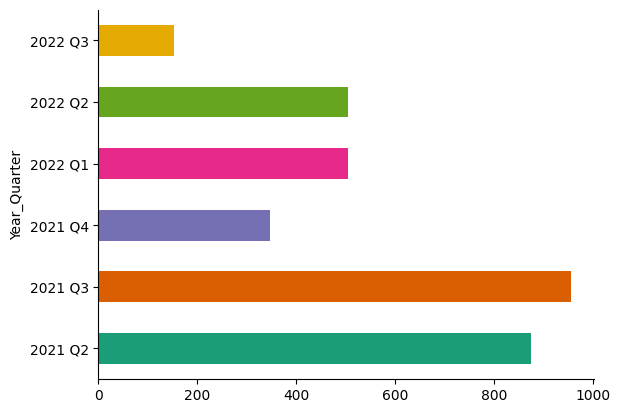

In [120]:
# @title Year_Quarter

from matplotlib import pyplot as plt
import seaborn as sns
df_tele_qtr_yr.groupby('Year_Quarter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

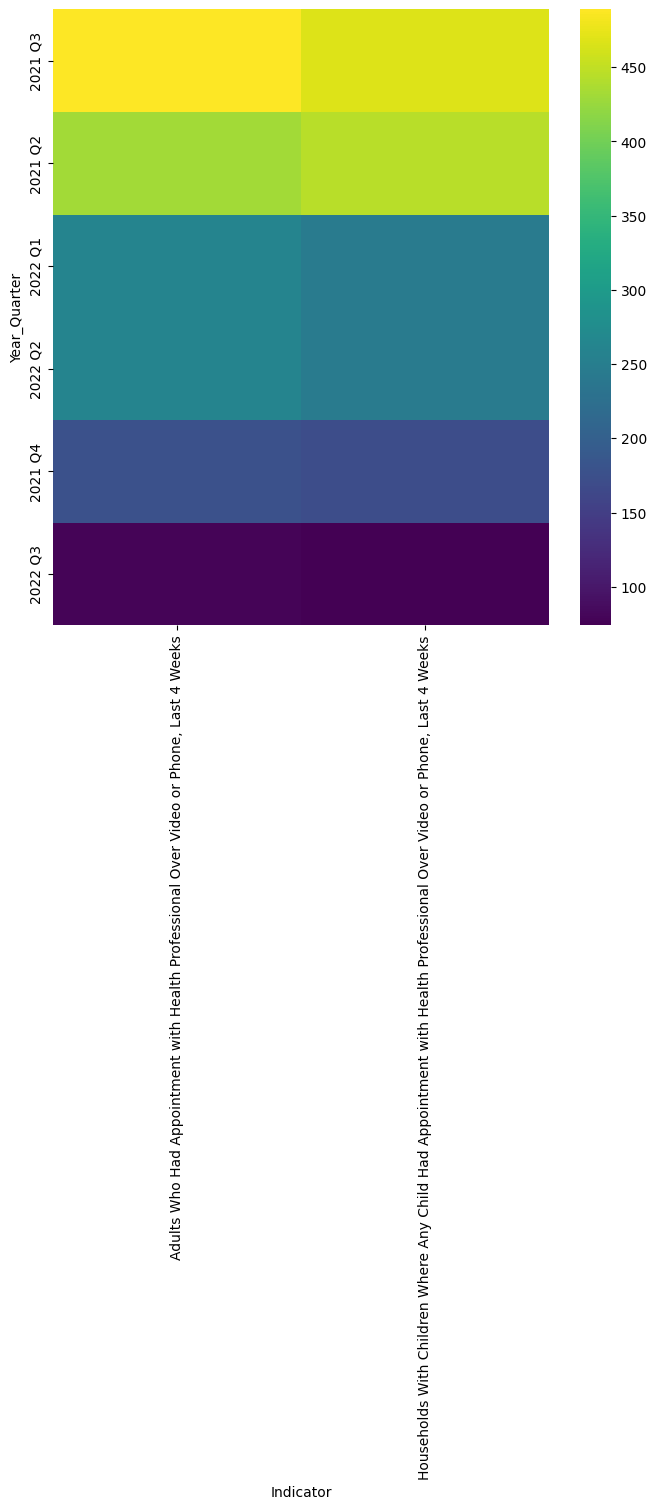

In [119]:
# @title Indicator vs Year_Quarter

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Year_Quarter'].value_counts()
    for x_label, grp in df_tele_qtr_yr.groupby('Indicator')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Indicator')
_ = plt.ylabel('Year_Quarter')

<ipython-input-118-90364990b0cd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_tele_qtr_yr, x='Time Period', y='Year_Quarter', inner='box', palette='Dark2')


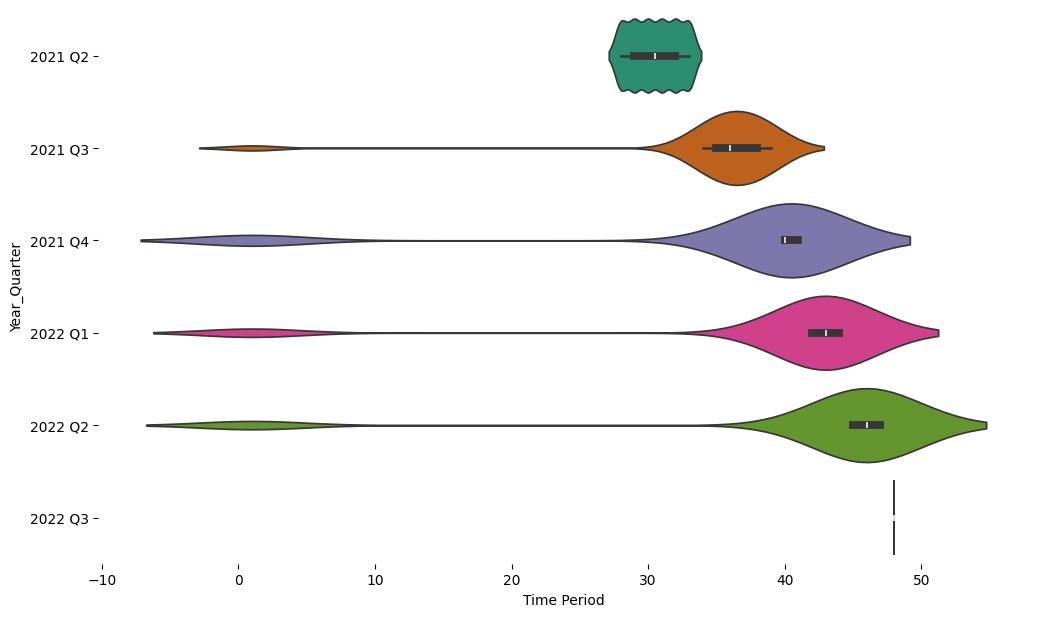

In [118]:
# @title Year_Quarter vs Time Period

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_tele_qtr_yr['Year_Quarter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_tele_qtr_yr, x='Time Period', y='Year_Quarter', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

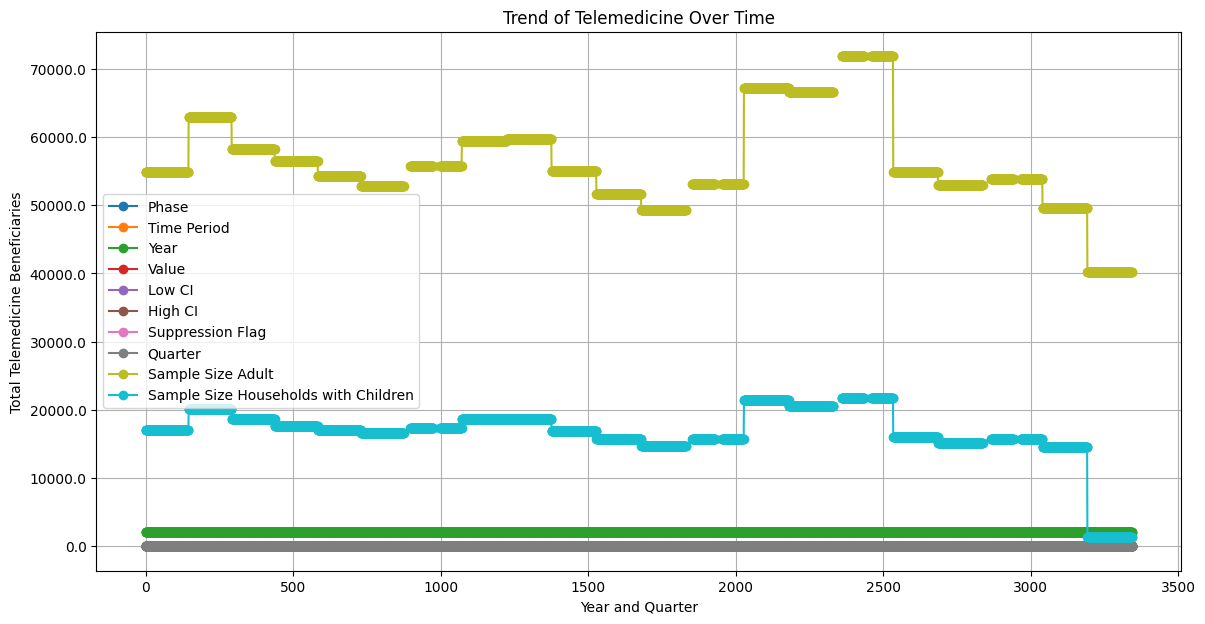

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick

df_tele_qtr_yr["Year_Quarter"] = df_tele_qtr_yr['Year'].astype(str) + ' Q' + df_tele_qtr_yr['Quarter'].astype(str)

tele_trend_recent = df_tele_qtr_yr.groupby('Year_Quarter')['Sample Size Adult'].sum()

fig, ax = plt.subplots(figsize=(14,7))
df_tele_qtr_yr.plot(kind="line", marker='o', ax=ax)

ax.yaxis.set_major_formatter(lambda x, pos: f'{x}')

plt.title('Trend of Telemedicine Over Time')
plt.ylabel('Total Telemedicine Beneficiaries')
plt.xlabel('Year and Quarter')
plt.grid('True')
plt.show()

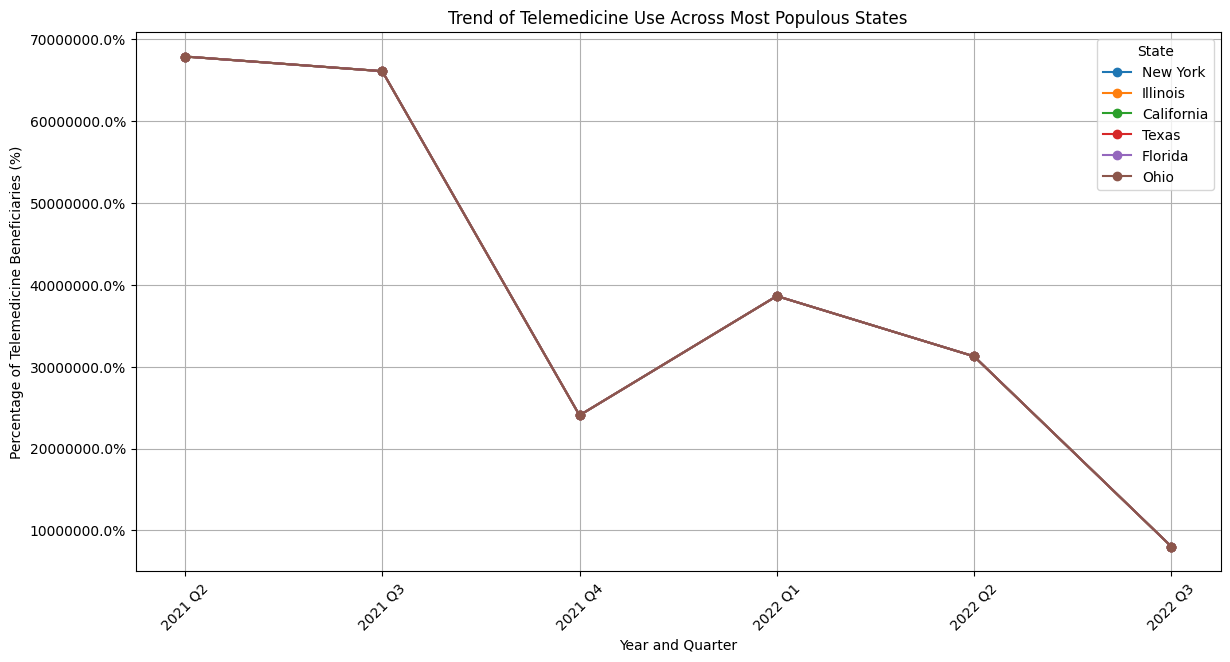

In [122]:
# Example states
states_of_interest = ['New York', 'Illinois', 'California', 'Texas', 'Florida', 'Ohio']  # Example

# Grouping data
grouped_data = df_tele_qtr_yr.groupby(['State', 'Year_Quarter'])[['Sample Size Adult', 'Sample Size Households with Children']].sum().reset_index()
#grouped_data['Sample Size Adult'] = grouped_data['Sample Size Households with Children'] / grouped_data['Sample Size Households with Children']

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
legends_added = False

for state in states_of_interest:
    state_data = grouped_data[grouped_data['State'] == state]
    if not state_data.empty:
        ax.plot(state_data['Year_Quarter'], state_data['Sample Size Adult'], marker='o', label=state)
        legends_added = True

if legends_added:
    ax.legend(title='State')
else:
    print("No data available for any of the specified states.")

ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda y, _: f'{100 * y:.1f}%'))
ax.set_title('Trend of Telemedicine Use Across Most Populous States')
ax.set_xlabel('Year and Quarter')
ax.set_ylabel('Percentage of Telemedicine Beneficiaries (%)')
plt.xticks(rotation=45)
ax.grid(True)
plt.show()


In [28]:
df_tele_qtr_yr_age

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
5,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,27.6,25.9,29.4,25.9 - 29.4,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,21.6,20.0,23.4,20.0 - 23.4,NaN,NaN,3
3196,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,24.4,22.5,26.4,22.5 - 26.4,NaN,NaN,3
3197,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,23.4,21.8,25.0,21.8 - 25.0,NaN,NaN,3
3198,Adults Who Had Appointment with Health Profess...,By Age,National,70 - 79 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,28.8,26.6,31.0,26.6 - 31.0,NaN,NaN,3
